# Análisis de una solución de la ecuación de Dirichlet

La solución de la ecuación 
$$\frac{\partial^{2}u}{\partial x^2} + \frac{\partial^{2}u}{\partial y^2} = 0$$
sujeta a las condiciones de frontera:
$$u(x,0) = u(x,1) = 0,\;\;\;0<x<1$$
Y la condición inicial:
$$u(0,y) = 10y,\ \frac{\partial u(1,y)}{\partial x} = -1, \;\;\; 0<x<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$ u(x,y) = \sum^{\infty}_{n=1} \left[ \frac{20(-1)^{n+1}}{n \pi}cosh(n \pi x) + \frac{2\left((-1)^{n} - 1\right) + 20n\pi(-1)^{n} senh(n \pi)}{n^2 \pi^2 cosh(n \pi)} senh(n \pi x) \right] sen(n \pi y) $$

In [ ]:
from pylab import *
from matplotlib import animation,rc # biblioteca de animacion
from IPython.display import HTML # biblioteca para generar el video
%config InlineBackend.figure_format = 'retina'

Para empezar, graficamos la condición inicial.

In [ ]:
def pendiente(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if (x[i] >= 0) and (x[i] <= 1):
          y[i] = (10*x)[i]
    return y

In [ ]:
def recta_1(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if (x[i] >= 0) and (x[i] <= 1):
          y[i] = -1
    return y

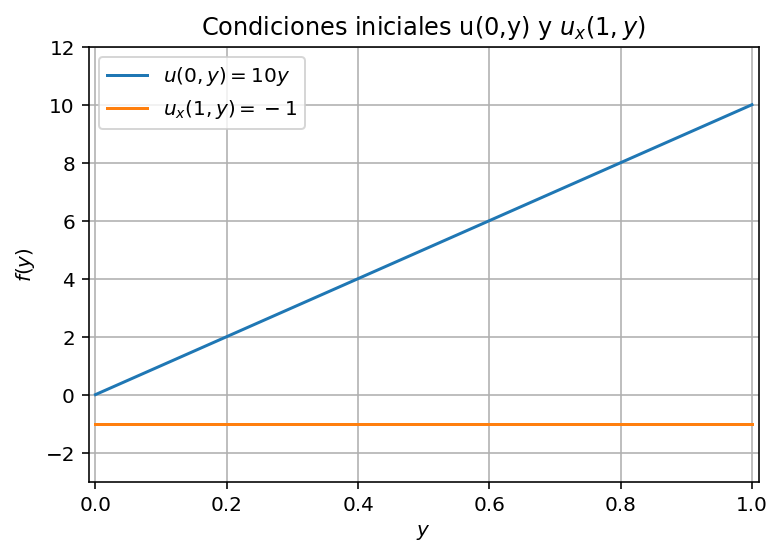

In [ ]:
x = linspace(0,1,1000)
f = pendiente(x)
f_1 = recta_1(x)
plot(x,f,label='$u(0,y)=10y$')
plot(x,f_1,label='$u_{x}(1,y)=-1$')
plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Condiciones iniciales u(0,y) y $u_{x}(1,y)$")
xlim([-0.01,1.01]),ylim([-3,12]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial 
$$u(0,y) = 10y,\;\;\;0<x<1$$

Y para aproximar la condición inicial 
$$\frac{\partial u(1,y)}{\partial x} = -1,\;\;\;0<x<1$$

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += 20.0*(0-cos(n*pi))*sin(n*pi*x)/(n*pi)
    return (f)

In [ ]:
def u_1(x,N=20): # N es el número de armónicos
    f_1 = zeros(len(x))
    for n in range(1,N):
        f_1 += 2.0*(cos(n*pi)-1)*sin(n*pi*x)/(n*pi)
    return (f_1)

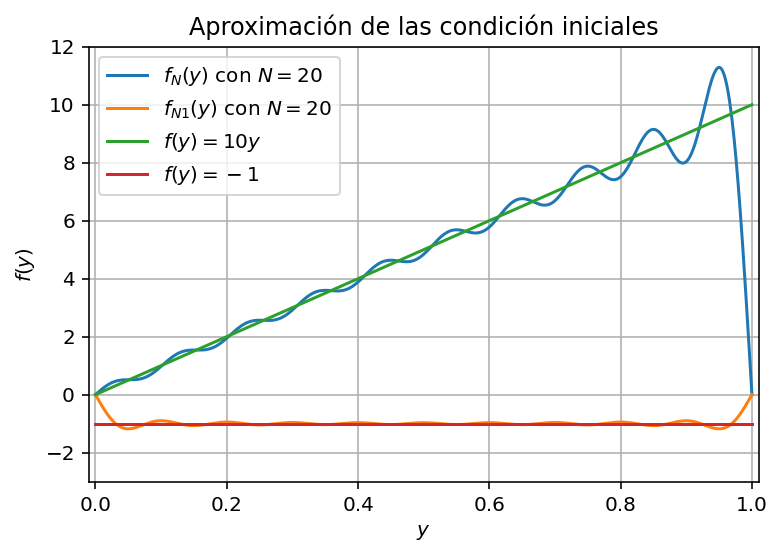

In [ ]:
f_n = u_0(x)
f_n1 = u_1(x)
plot(x,f_n,label='$f_N(y)$ con $N=20$')
plot(x,f_n1,label='$f_{N1}(y)$ con $N=20$')
plot(x,f,label='$f(y)=10y$')
plot(x,f_1,label='$f(y)=-1$')
plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Aproximación de las condición iniciales")
xlim([-0.01,1.01]),ylim([-3,12]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

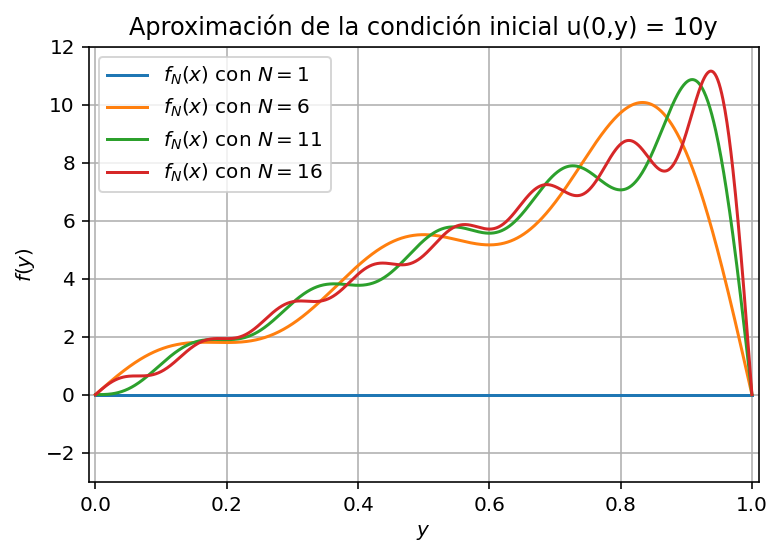

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Aproximación de la condición inicial u(0,y) = 10y")
xlim([-0.01,1.01]),ylim([-3,12]),grid(),legend()
show()

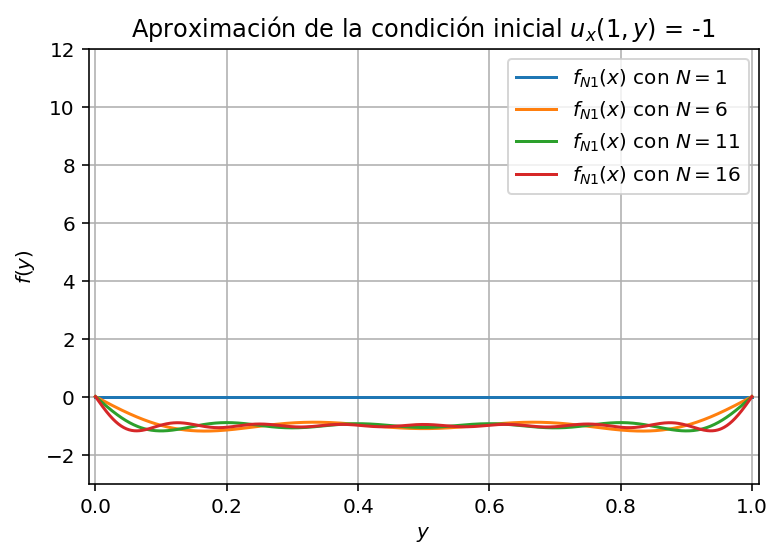

In [ ]:
for i in range(1,20,5):
    plot(x,u_1(x,i),label='$f_{N1}(x)$ con $N=%d$' %i)
plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Aproximación de la condición inicial $u_x(1,y)$ = -1")
xlim([-0.01,1.01]),ylim([-3,12]),grid(),legend()
show()

Ahora, agregamos la parte de x para visualizar la solución completa. Primero, para el momento inicial, $x=0$.

In [ ]:
def u_x_y(x,y,N=8):
    f = zeros( (len(x),len(y)) )
    for i in range(len(y)):
        for n in range(1,N):
            a_n = 20.0*(0-cos(n*pi))/(n*pi)
            b_n = (2.0*(cos(n*pi)-1)+20*n*pi*cos(n*pi)*sinh(n*pi))/((n**2)*(pi**2)*cosh(n*pi))
            f[:,i] += (a_n*cosh(n*pi*y[i]) + b_n*sinh(n*pi*y[i]))*sin(n*pi*x)
    return (f)

In [ ]:
x = linspace(0,1,1000)
y = linspace(0,10,1000)
U = u_x_y(x,y)

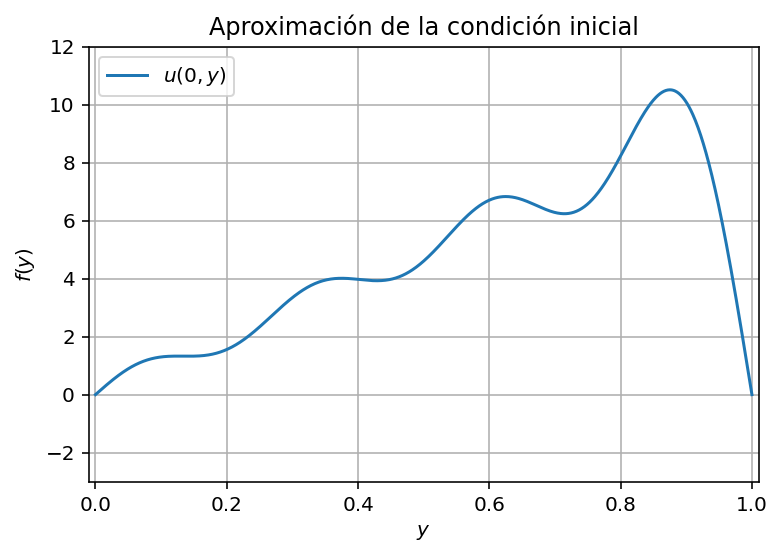

In [ ]:
plot(x,U[:,0],label='$u(0,y)$')
plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-3,12]),grid(),legend()
show()

Luego, para diferentes valores de y, lo cual nos permite ver cómo la solución evoluciona cuando $x \to ∞$.

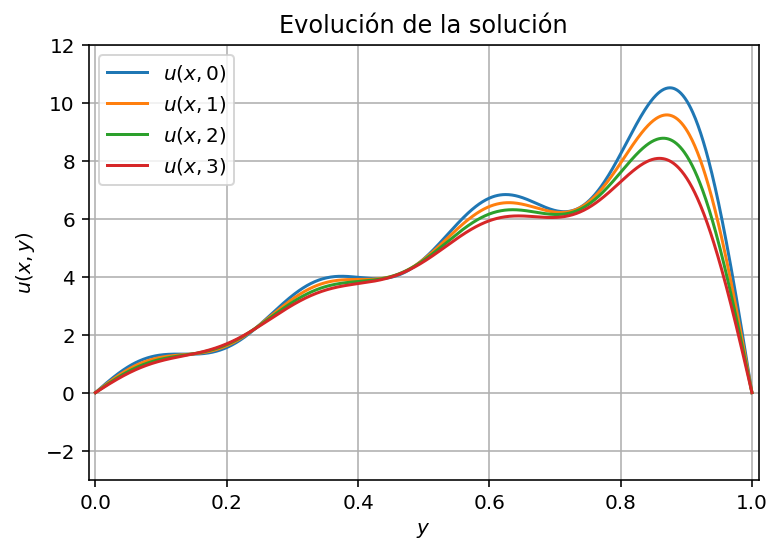

In [ ]:
plot(x,U[:,0],label='$u(x,0)$') # Mejorar
plot(x,U[:,1],label='$u(x,1)$')
plot(x,U[:,2],label='$u(x,2)$')
plot(x,U[:,3],label='$u(x,3)$')
plt.xlabel('$y$'); plt.ylabel('$u(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-3,12]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

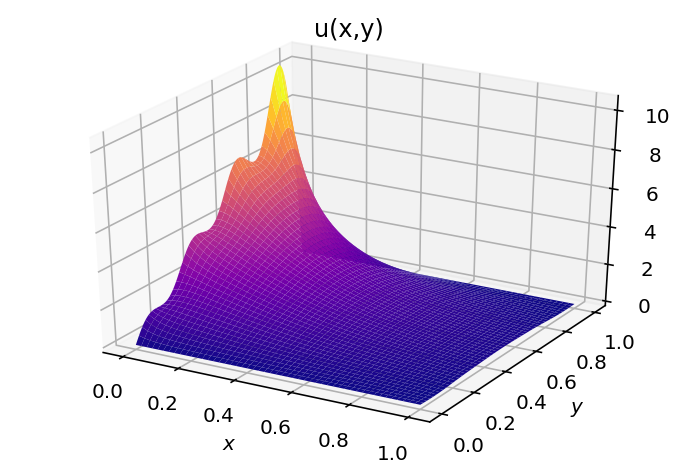

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
n=30

x = linspace(0,1.0,1000)
y = linspace(0,1.0,1000)

X,Y = np.meshgrid(x,y)

U = u_x_y(x,y)

plt.xlabel('$x$'); plt.ylabel('$y$'); 
plt.title("u(x,y)")
ax.plot_surface(X, Y, U, cmap="plasma"); #Otros colores:"viridis", "inferno", "plasma"